In [3]:
import pandas as pd
datos = pd.read_excel("./Peso y Consumo.xlsx")
datos = datos.drop("No", axis=1)
datos = datos.rename(columns={"Peso (Kg)":"Peso","Consumo (L/100Km)":"Consumo"})
datos.head()

,Peso Kg,Consumo litros/100Km
0,981,11
1,878,12
2,708,8
3,1138,11
4,1064,13


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Peso Kg               30 non-null     int64
 1   Consumo litros/100Km  30 non-null     int64
dtypes: int64(2)
memory usage: 612.0 bytes


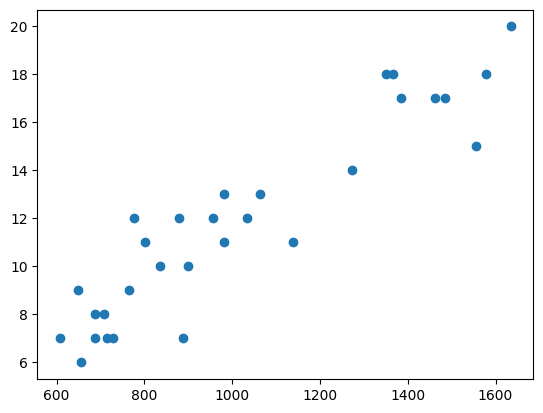

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(datos["Peso Kg"], datos["Consumo litros/100Km"])


In [ ]:
#!pip install Jinja2
datos.corr().style.highlight_max(color="blue")


   -------------------- ------------------- 1/2 [Jinja2]
   ---------------------------------------- 2/2 [Jinja2]



,Peso Kg,Consumo litros/100Km
Peso Kg,1.000000,0.928509
Consumo litros/100Km,0.928509,1.000000


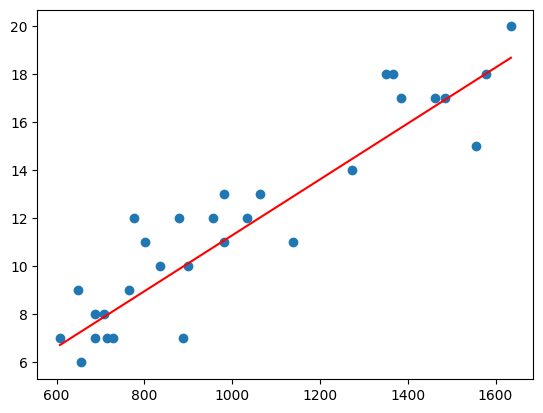

In [7]:
x = datos[["Peso Kg"]]
y = datos[["Consumo litros/100Km"]]
coeficientes = np.polyfit(x["Peso Kg"], y["Consumo litros/100Km"], 2)
polinomio = np.poly1d(coeficientes)
x_nuevo = np.linspace(x.min(), x.max(), 2)
y_nuevo = polinomio(x_nuevo)
plt.scatter(x, y, label='Datos Originales')
plt.plot(x_nuevo, y_nuevo, color='red', label=f'Ajuste Polinomial de Grado {2}')

In [8]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(x,y)
print("Ecuación: y =", modelo.intercept_[0], "+", modelo.coef_[0][0], "* x")
modelo.score(x,y)

Ecuación: y = -0.07126060818422175 + 0.01173068517017775 * x


0.8621293337804034

Error cuadrático medio: 2.2218623809433677


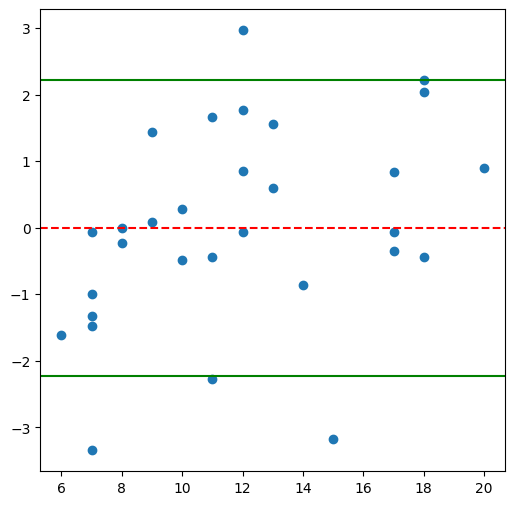

In [9]:
from sklearn.metrics import mean_squared_error
y_pred = modelo.predict(x)
residuos = y - y_pred
fig = plt.figure(figsize=(6,6))
mse = mean_squared_error(y, y_pred)
print("Error cuadrático medio:", mse)
plt.scatter(y, residuos)
plt.axhline(mse, color='g', linestyle='-')
plt.axhline(-mse, color='g', linestyle='-')
plt.axhline(y=0, color='r', linestyle='--')

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.20,
    random_state=0
)
regresion = LinearRegression()
regresion.fit(X_train, y_train)
print("Ecuación: y =", regresion.intercept_[0], "+", regresion.coef_[0][0], "* x")
score = regresion.score(X_train, y_train)
print("Score:", score)

Ecuación: y = 0.11752745971073608 + 0.011532739167449412 * x
Score: 0.7844254580589514


Error cuadrático medio: 0.20894660499925796


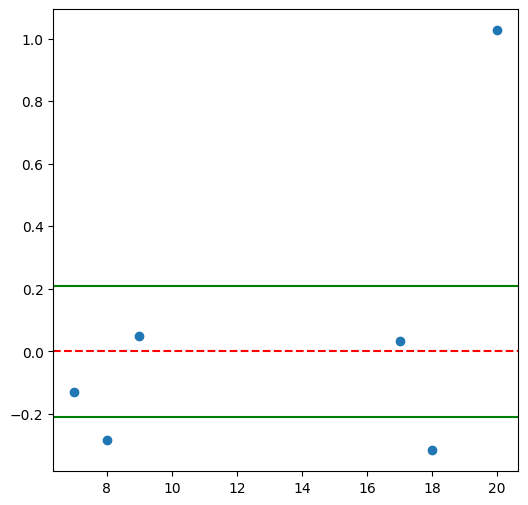

In [11]:
y_pred = regresion.predict(X_test)
residuos = y_test - y_pred
fig = plt.figure(figsize=(6,6))
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)
plt.scatter(y_test, residuos)
plt.axhline(mse, color='g', linestyle='-')
plt.axhline(-mse, color='g', linestyle='-')
plt.axhline(y=0, color='r', linestyle='--')

In [16]:
#!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
datos_train=X_train.join(y_train)
from patsy import dmatrices, ModelDesc, Term, EvalFactor

modelo = smf.ols(formula='Q("Consumo litros/100Km") ~ Q("Peso Kg")', data=datos_train).fit()
print(modelo.summary())

                                OLS Regression Results                               
Dep. Variable:     Q("Consumo litros/100Km")   R-squared:                       0.784
Model:                                   OLS   Adj. R-squared:                  0.775
Method:                        Least Squares   F-statistic:                     80.05
Date:                       Tue, 30 Sep 2025   Prob (F-statistic):           8.77e-09
Time:                               07:22:53   Log-Likelihood:                -46.107
No. Observations:                         24   AIC:                             96.21
Df Residuals:                             22   BIC:                             98.57
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------